# SUPERVISED LEARNING 

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
%matplotlib inline


In [2]:
df = pd.read_csv("C:\\Users\\Personal\\Downloads\\Household_Study_Database.csv" )

In [3]:
df.head()

Family Code  Individual Code  Incident TB Disease  \
0            1                1                    0   
1            1                2                    0   
2            1                3                    0   
3            1                4                    0   
4            1                5                    0   

  MDR or Sensitive Household  Follow Up Time  Index Sex  Index Education  \
0                        MDR             545          1              2.0   
1                        MDR             118          1              2.0   
2                        MDR             118          1              2.0   
3                        MDR             118          1              2.0   
4                        MDR             545          1              2.0   

   Index Sputum Smear Grade  Index Diabetes  Index Incarceration  ...  \
0                       0.0               0                    0  ...   
1                       0.0               0                    0  ...   
2                       0.0               0                    0  ...   
3                       0.0               0                    0  ...   
4                       0.0               0                    0  ...   

   Socio Economic Tertile  Contact Age  Contact Sex  Contact Chemotherapy  \
0                       2          NaN          NaN                   NaN   
1                       2          2.0          1.0                   1.0   
2                       2          3.0          0.0                   1.0   
3                       2          3.0          1.0                   0.0   
4                       2          8.0          0.0                   0.0   

   Contact Work  Contact HIV  Index Strain Genotype  Contact Diabetes  \
0           NaN          NaN                      4               NaN   
1           3.0          0.0                      4               0.0   
2           3.0          0.0                      4               0.0   
3           3.0          0.0                      4               0.0   
4           1.0          0.0                      4               0.0   

   Contact-Index Roomshare  Contact Previous TB History  
0                      NaN                          NaN  
1                      0.0                          0.0  
2                      0.0                          0.0  
3                      0.0                          0.0  
4                      0.0                          0.0  

[5 rows x 29 columns]

In [4]:
df.isnull()

Family Code  Individual Code  Incident TB Disease  \
0           False            False                False   
1           False            False                False   
2           False            False                False   
3           False            False                False   
4           False            False                False   
...           ...              ...                  ...   
4112        False            False                False   
4113        False            False                False   
4114        False            False                False   
4115        False            False                False   
4116        False            False                False   

      MDR or Sensitive Household  Follow Up Time  Index Sex  Index Education  \
0                          False           False      False            False   
1                          False           False      False            False   
2                          False           False      False            False   
3                          False           False      False            False   
4                          False           False      False            False   
...                          ...             ...        ...              ...   
4112                       False           False      False            False   
4113                       False           False      False            False   
4114                       False           False      False            False   
4115                       False           False      False            False   
4116                       False           False      False            False   

      Index Sputum Smear Grade  Index Diabetes  Index Incarceration  ...  \
0                        False           False                False  ...   
1                        False           False                False  ...   
2                        False           False                False  ...   
3                        False           False                False  ...   
4                        False           False                False  ...   
...                        ...             ...                  ...  ...   
4112                     False           False                False  ...   
4113                     False           False                False  ...   
4114                     False           False                False  ...   
4115                     False           False                False  ...   
4116                     False           False                False  ...   

      Socio Economic Tertile  Contact Age  Contact Sex  Contact Chemotherapy  \
0                      False         True         True                  True   
1                      False        False        False                 False   
2                      False        False        False                 False   
3                      False        False        False                 False   
4                      False        False        False                 False   
...                      ...          ...          ...                   ...   
4112                   False        False        False                 False   
4113                   False         True         True                  True   
4114                   False        False        False                 False   
4115                   False        False        False                 False   
4116                   False        False        False                 False   

      Contact Work  Contact HIV  Index Strain Genotype  Contact Diabetes  \
0             True         True                  False              True   
1            False        False                  False             False   
2            False        False                  False             False   
3            False        False                  False             False   
4            False        False                  False             False   
...   

In [5]:
import seaborn as sns

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

<AxesSubplot:>

In [7]:
print(df.dtypes)

Family Code                           int64
Individual Code                       int64
Incident TB Disease                   int64
MDR or Sensitive Household           object
Follow Up Time                        int64
Index Sex                             int64
Index Education                     float64
Index Sputum Smear Grade            float64
Index Diabetes                        int64
Index Incarceration                   int64
Index Hospitalization                 int64
Index Alcohol Use                   float64
Index Tobacco Use                   float64
Index Side Effects of Medication    float64
Index History of TB Before          float64
Index HIV Status                      int64
Index Cough Duration (days)         float64
Index Work                          float64
MDR Sensitive Numeric                 int64
Socio Economic Tertile                int64
Contact Age                         float64
Contact Sex                         float64
Contact Chemotherapy            

<AxesSubplot:xlabel='Incident TB Disease', ylabel='count'>

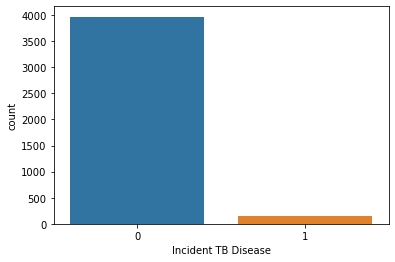

In [8]:
sns.countplot(x='Incident TB Disease', data = df)

In [9]:
df['Incident TB Disease'].value_counts()

0    3968
1     149
Name: Incident TB Disease, dtype: int64

In [10]:
df.isnull().sum()

Family Code                            0
Individual Code                        0
Incident TB Disease                    0
MDR or Sensitive Household             0
Follow Up Time                         0
Index Sex                              0
Index Education                       54
Index Sputum Smear Grade             128
Index Diabetes                         0
Index Incarceration                    0
Index Hospitalization                  0
Index Alcohol Use                     17
Index Tobacco Use                     26
Index Side Effects of Medication      68
Index History of TB Before            28
Index HIV Status                       0
Index Cough Duration (days)          145
Index Work                            17
MDR Sensitive Numeric                  0
Socio Economic Tertile                 0
Contact Age                          711
Contact Sex                          700
Contact Chemotherapy                 712
Contact Work                        1061
Contact HIV     

<AxesSubplot:xlabel='Incident TB Disease', ylabel='count'>

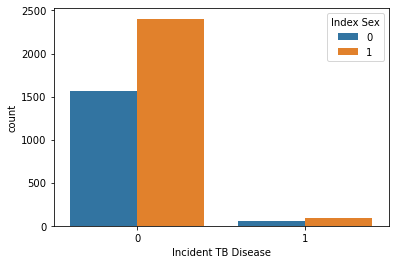

In [11]:
sns.countplot(x='Incident TB Disease', hue = 'Index Sex', data = df)

<AxesSubplot:xlabel='Incident TB Disease', ylabel='count'>

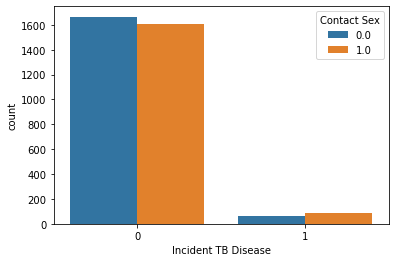

In [12]:
sns.countplot(x='Incident TB Disease', hue = 'Contact Sex', data = df)

In [13]:
df['Index Sputum Smear Grade'].value_counts()

3.0    1444
1.0    1119
2.0    1008
0.0     418
Name: Index Sputum Smear Grade, dtype: int64

In [14]:
df.groupby('Incident TB Disease').count()

Family Code  Individual Code  MDR or Sensitive Household  \
Incident TB Disease                                                             
0                           3968             3968                        3968   
1                            149              149                         149   

                     Follow Up Time  Index Sex  Index Education  \
Incident TB Disease                                               
0                              3968       3968             3917   
1                               149        149              146   

                     Index Sputum Smear Grade  Index Diabetes  \
Incident TB Disease                                             
0                                        3857            3968   
1                                         132             149   

                     Index Incarceration  Index Hospitalization  ...  \
Incident TB Disease                                              ...   
0                                   3968                   3968  ...   
1                                    149                    149  ...   

                     Socio Economic Tertile  Contact Age  Contact Sex  \
Incident TB Disease                                                     
0                                      3968         3257         3268   
1                                       149          149          149   

                     Contact Chemotherapy  Contact Work  Contact HIV  \
Incident TB Disease                                                    
0                                    3257          2925         3268   
1                                     148           131          149   

                     Index Strain Genotype  Contact Diabetes  \
Incident TB Disease                                            
0                                     3968              3268   
1                                      149               149   

                     Contact-Index Roomshare  Contact Previous TB History  
Incident TB Disease                                                        
0                                       3254                         3249  
1                                        137                          147  

[2 rows x 28 columns]

In [15]:
df.describe(include='all') 

Family Code  Individual Code  Incident TB Disease  \
count   4117.000000      4117.000000          4117.000000   
unique          NaN              NaN                  NaN   
top             NaN              NaN                  NaN   
freq            NaN              NaN                  NaN   
mean     352.991013         4.104202             0.036191   
std      204.801555         2.792391             0.186789   
min        1.000000         1.000000             0.000000   
25%      177.000000         2.000000             0.000000   
50%      352.000000         4.000000             0.000000   
75%      530.000000         5.000000             0.000000   
max      700.000000        21.000000             1.000000   

       MDR or Sensitive Household  Follow Up Time    Index Sex  \
count                        4117     4117.000000  4117.000000   
unique                          2             NaN          NaN   
top                          SENS             NaN          NaN   
freq                         2849             NaN          NaN   
mean                          NaN      437.224435     0.606995   
std                           NaN      194.644767     0.488477   
min                           NaN        1.000000     0.000000   
25%                           NaN      287.000000     0.000000   
50%                           NaN      417.000000     1.000000   
75%                           NaN      592.000000     1.000000   
max                           NaN      962.000000     1.000000   

        Index Education  Index Sputum Smear Grade  Index Diabetes  \
count       4063.000000               3989.000000     4117.000000   
unique              NaN                       NaN             NaN   
top                 NaN                       NaN             NaN   
freq                NaN                       NaN             NaN   
mean           1.598819                  1.871898        0.058295   
std            0.490198                  1.022507        0.234329   
min            1.000000                  0.000000        0.000000   
25%            1.000000                  1.000000        0.000000   
50%            2.000000                  2.000000        0.000000   
75%            2.000000                  3.000000        0.000000   
max            2.000000                  3.000000        1.000000   

        Index Incarceration  ...  Socio Economic Tertile  Contact Age  \
count           4117.000000  ...             4117.000000  3406.000000   
unique                  NaN  ...                     NaN          NaN   
top                     NaN  ...                     NaN          NaN   
freq                    NaN  ...                     NaN          NaN   
mean               0.045907  ...                1.867622     3.627716   
std                0.209309  ...                0.822257     1.931875   
min                0.000000  ...                1.000000     1.000000   
25%                0.000000  ...                1.000000     2.000000   
50%                0.000000  ...                2.000000     3.000000   
75%                0.000000  ...                3.000000     5.000000   
max                1.000000  ...                3.000000     9.000000   

        Contact Sex  Contact Chemotherapy  Contact Work  Contact HIV  \
count   3417.000000           3405.000000   3056.000000  3417.000000   
unique          NaN                   NaN           NaN          NaN   
top             NaN                   NaN           NaN          NaN   
freq            NaN                   NaN           NaN          NaN   
mean       0.494879              0.158297      2.018979     0.005853   
std        0.500047              0.365073      0.747478     0.076292   
min        0.000000              0.000000      1.000000     0.000000   
25%        0.000000              0.000000      1.000000     0.000000   
50%        0.000000              0.000000      2.000000     0.000000   
75%        1.000000              0.000000      3.000000 

### Imputation for missing values Since the data set has multiple data types of objects integres and float we should corece to a format and replace all NaN values with appropriate methodds

In [16]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [17]:
df.head(20)

Family Code  Individual Code  Incident TB Disease  \
0             1                1                    0   
1             1                2                    0   
2             1                3                    0   
3             1                4                    0   
4             1                5                    0   
5             1                6                    0   
6             2                1                    0   
7             2                2                    0   
8             2                3                    0   
9             2                4                    0   
10            2                5                    0   
11            2                6                    0   
12            2                7                    0   
13            2                8                    0   
14            2                9                    0   
15            3                1                    0   
16            3                2                    0   
17            3                3                    0   
18            3                4                    0   
19            3                5                    0   

   MDR or Sensitive Household  Follow Up Time  Index Sex  Index Education  \
0                         MDR             545          1              2.0   
1                         MDR             118          1              2.0   
2                         MDR             118          1              2.0   
3                         MDR             118          1              2.0   
4                         MDR             545          1              2.0   
5                         MDR             545          1              2.0   
6                        SENS             489          0              1.0   
7                        SENS             489          0              1.0   
8                        SENS             489          0              1.0   
9                        SENS             489          0              1.0   
10                       SENS             489          0              1.0   
11                       SENS             489          0              1.0   
12                       SENS             489          0              1.0   
13                       SENS             489          0              1.0   
14                       SENS             489          0              1.0   
15                        MDR             852          0              2.0   
16                        MDR             852          0              2.0   
17                        MDR             852          0              2.0   
18                        MDR             852          0              2.0   
19                        MDR             852          0              2.0   

    Index Sputum Smear Grade  Index Diabetes  Index Incarceration  ...  \
0                        0.0               0                    0  ...   
1                        0.0               0                    0  ...   
2                        0.0               0                    0  ...   
3                        0.0               0                    0  ...   
4                        0.0               0                    0  ...   
5                        0.0               0                    0  ...   
6                        2.0               0                    0  ...   
7                        2.0               0                    0  ...   
8                        2.0               0                    0  ...   
9                        2.0               0                    0  ...   
10                       2.0               0                    0  ...   
11                       2.0               0                    0  ...   
12                       2.0               0                    0  ...   
13                       2.0               0                    0  ...   
14                       2.0               0                    0  ...   
15  

In [18]:
df.isnull().sum()

Family Code                         0
Individual Code                     0
Incident TB Disease                 0
MDR or Sensitive Household          0
Follow Up Time                      0
Index Sex                           0
Index Education                     0
Index Sputum Smear Grade            0
Index Diabetes                      0
Index Incarceration                 0
Index Hospitalization               0
Index Alcohol Use                   0
Index Tobacco Use                   0
Index Side Effects of Medication    0
Index History of TB Before          0
Index HIV Status                    0
Index Cough Duration (days)         0
Index Work                          0
MDR Sensitive Numeric               0
Socio Economic Tertile              0
Contact Age                         0
Contact Sex                         0
Contact Chemotherapy                0
Contact Work                        0
Contact HIV                         0
Index Strain Genotype               0
Contact Diab

<AxesSubplot:xlabel='Incident TB Disease', ylabel='count'>

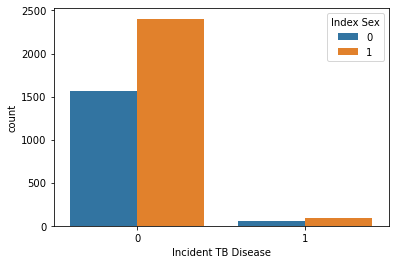

In [19]:
sns.countplot(x='Incident TB Disease', hue = 'Index Sex', data = df)

<AxesSubplot:xlabel='Index Education', ylabel='count'>

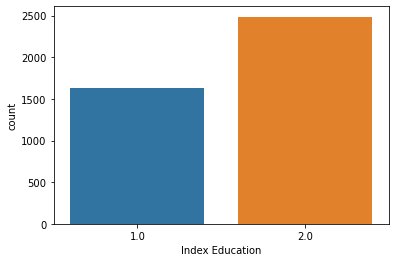

In [20]:
sns.countplot(x='Index Education', data = df)

In [21]:
df['Index Education'].value_counts()

2.0    2487
1.0    1630
Name: Index Education, dtype: int64

In [22]:
from sklearn.feature_selection import chi2

In [23]:
y = df['MDR Sensitive Numeric']
X = df.drop(['MDR Sensitive Numeric'], axis = 1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.3)

In [25]:
cor = X_train.corr()
plt.figure(figsize=(18,12))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

## But the correlation is useless for many features that are not linear continuos 

### Instead use Chi2 test

In [26]:
X_train = X_train.drop('MDR or Sensitive Household', axis=1)

In [27]:
X_train

Family Code  Individual Code  Incident TB Disease  Follow Up Time  \
1883          320                1                    0             427   
3878          665                9                    0             472   
3338          568                3                    0             342   
2666          465                4                    0             216   
989           172                2                    0             636   
...           ...              ...                  ...             ...   
802           133                4                    0             653   
1890          321                3                    0             342   
350            59                5                    0             566   
79             11                7                    1             222   
3927          671                3                    0             418   

      Index Sex  Index Education  Index Sputum Smear Grade  Index Diabetes  \
1883          1              2.0                       0.0               0   
3878          1              1.0                       3.0               0   
3338          1              1.0                       3.0               0   
2666          1              2.0                       3.0               0   
989           1              1.0                       0.0               0   
...         ...              ...                       ...             ...   
802           0              2.0                       1.0               0   
1890          1              2.0                       0.0               0   
350           1              2.0                       3.0               0   
79            1              1.0                       0.0               0   
3927          1              2.0                       3.0               0   

      Index Incarceration  Index Hospitalization  ...  Socio Economic Tertile  \
1883                    0                      0  ...                       1   
3878                    0                      0  ...                       2   
3338                    0                      0  ...                       1   
2666                    0                      0  ...                       3   
989                     0                      1  ...                       2   
...                   ...                    ...  ...                     ...   
802                     0                      0  ...                       1   
1890                    0                      0  ...                       1   
350                     0                      0  ...                       1   
79                      0                      1  ...                       3   
3927                    0                      0  ...                       3   

      Contact Age  Contact Sex  Contact Chemotherapy  Contact Work  \
1883          4.0          0.0                   0.0           2.0   
3878          1.0          1.0                   0.0           2.0   
3338          1.0          0.0                   0.0           2.0   
2666          2.0          0.0                   1.0           2.0   
989           7.0          1.0                   0.0           2.0   
...           ...          ...                   ...           ...   
802           6.0          0.0                   0.0           1.0   
1890          1.0          0.0                   0.0           1.0   
350           3.0          1.0                   1.0           1.0   
79            4.0          1.0                   0.0           2.0   
3927          2.0          1.0                   1.0           3.0   

      Contact HIV  Index Strain Genotype  Contact Diabetes  \
1883          0.0                      1               0.0   
3878          0.0                      8               0.0   
3338          0.0                      4               0.0   
2666          0.0                      4               0.0   
989           0.0                      5    

In [28]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [29]:
f_p_values

(array([3.44418457e+02, 2.42304431e-01, 5.22305720e-01, 9.36080268e+03,
        4.42368393e-01, 2.27074316e+00, 2.47016352e-01, 1.15944557e-02,
        2.30788312e+00, 3.93211790e+01, 6.81849521e-01, 7.24035531e+00,
        6.76955441e+01, 1.04958100e+02, 1.25245104e+01, 2.34527980e+01,
        7.40606169e+00, 2.50782081e+00, 9.19933799e-02, 1.18959585e+00,
        1.14711905e+01, 2.83794322e-01, 1.11639045e+00, 1.80905506e+02,
        1.36585646e-01, 2.18399883e-01, 5.68669632e-01]),
 array([6.96028744e-77, 6.22546665e-01, 4.69859781e-01, 0.00000000e+00,
        5.05981542e-01, 1.31836670e-01, 6.19183836e-01, 9.14251475e-01,
        1.28719244e-01, 3.59520508e-10, 4.08950575e-01, 7.12828723e-03,
        1.90794239e-16, 1.24746042e-24, 4.01648122e-04, 1.28016398e-06,
        6.50044695e-03, 1.13282484e-01, 7.61658118e-01, 2.75411093e-01,
        7.06833870e-04, 5.94225000e-01, 2.90697012e-01, 3.07407430e-41,
        7.11699217e-01, 6.40261841e-01, 4.50788054e-01]))

In [30]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values   

Family Code                         6.960287e-77
Individual Code                     6.225467e-01
Incident TB Disease                 4.698598e-01
Follow Up Time                      0.000000e+00
Index Sex                           5.059815e-01
Index Education                     1.318367e-01
Index Sputum Smear Grade            6.191838e-01
Index Diabetes                      9.142515e-01
Index Incarceration                 1.287192e-01
Index Hospitalization               3.595205e-10
Index Alcohol Use                   4.089506e-01
Index Tobacco Use                   7.128287e-03
Index Side Effects of Medication    1.907942e-16
Index History of TB Before          1.247460e-24
Index HIV Status                    4.016481e-04
Index Cough Duration (days)         1.280164e-06
Index Work                          6.500447e-03
Socio Economic Tertile              1.132825e-01
Contact Age                         7.616581e-01
Contact Sex                         2.754111e-01
Contact Chemotherapy

In [31]:
p_values = p_values.sort_index(ascending=False)

In [32]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([4.17830977e-01, 2.65635130e-03, 1.04962972e-03, 3.23949707e-01,
       0.00000000e+00, 7.56249829e-03, 0.00000000e+00, 0.00000000e+00,
       1.74275435e-02, 1.85576603e-02, 1.80568570e-03, 4.85530905e-03,
       2.92057618e-02, 1.56632181e-02, 1.63238626e-03, 7.77021881e-03,
       0.00000000e+00, 1.66173970e-02, 5.44992771e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.89869055e-03, 4.75686258e-02,
       1.37926968e-02, 1.55584669e-05, 1.18993305e-02])

In [33]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Family Code                         0.417831
Follow Up Time                      0.323950
Index Strain Genotype               0.047569
Index Side Effects of Medication    0.029206
Index Hospitalization               0.018558
Index Incarceration                 0.017428
Socio Economic Tertile              0.016617
Index History of TB Before          0.015663
Contact Diabetes                    0.013793
Contact Previous TB History         0.011899
Index Cough Duration (days)         0.007770
Index Education                     0.007562
Contact Age                         0.005450
Index Tobacco Use                   0.004855
Individual Code                     0.002656
Contact HIV                         0.001899
Index Alcohol Use                   0.001806
Index HIV Status                    0.001632
Incident TB Disease                 0.001050
Contact-Index Roomshare             0.000016
Contact Work                        0.000000
Index Diabetes                      0.000000
Contact Ch

<AxesSubplot:>

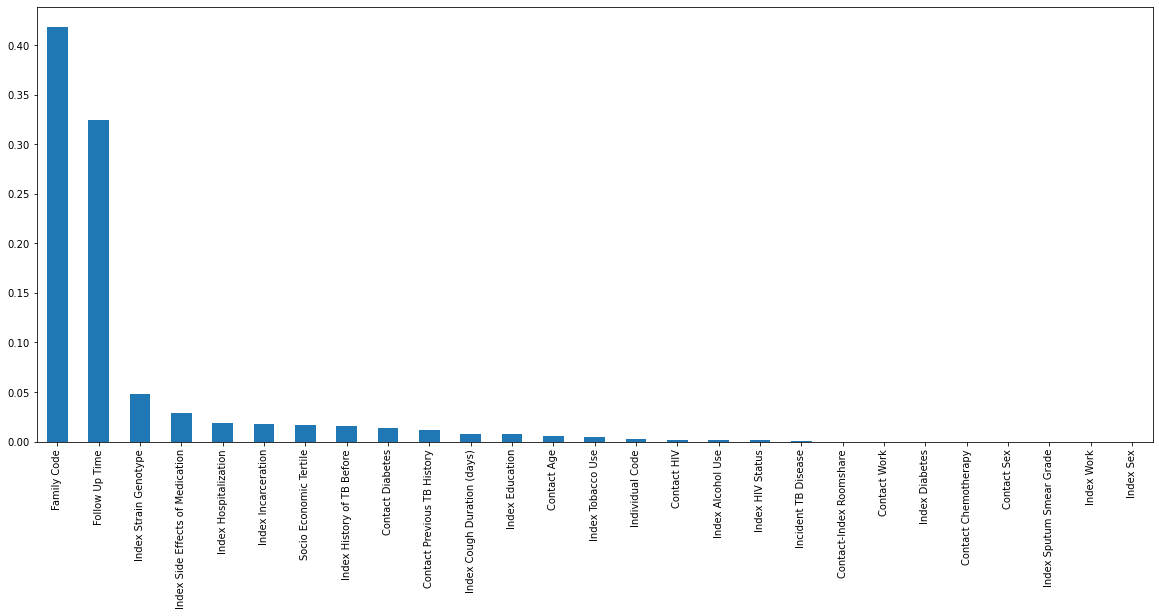

In [34]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [35]:
from sklearn.feature_selection import SelectKBest
#No we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=15)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Family Code', 'Individual Code', 'Follow Up Time', 'Index Sex',
       'Index Education', 'Index Sputum Smear Grade', 'Index Hospitalization',
       'Index Side Effects of Medication', 'Index History of TB Before',
       'Index HIV Status', 'Index Cough Duration (days)',
       'Socio Economic Tertile', 'Contact Age', 'Contact Work',
       'Index Strain Genotype'],
      dtype='object')

In [36]:
X_train = X_train[['Family Code', 'Follow Up Time', 'Index Sputum Smear Grade',
       'Index Hospitalization', 'Index Tobacco Use',
       'Index Side Effects of Medication', 'Index History of TB Before',
       'Index HIV Status', 'Index Cough Duration (days)', 'Index Work',
       'Contact Chemotherapy', 'Contact Work', 'Index Strain Genotype',
       'Contact-Index Roomshare', 'Contact Previous TB History']].copy()

## Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [39]:
prediction =logreg.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [41]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
cnf_matrix

array([[15,  0],
       [ 0, 10]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

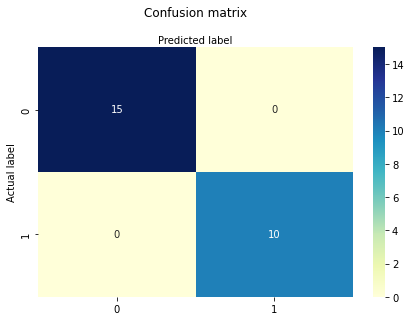

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

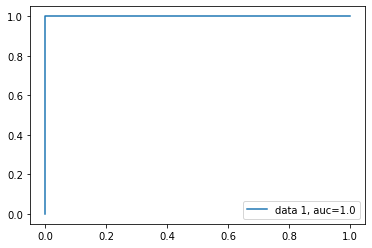

In [43]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Support Vector Machine on the Train and test data

In [44]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [45]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.91      1.00      0.95        10

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25



### SVM performing at 96%,

## Random tree Classification  Model

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [62]:
predictions = model.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0])

In [63]:
model.classes_

array([0, 1])

In [64]:
model.feature_importances_

array([0.02701002, 0.23697898, 0.01748818, 0.02776194, 0.0412952 ,
       0.02877976, 0.01207417, 0.01668187, 0.01492729, 0.01004891,
       0.36580963, 0.03273199, 0.01904834, 0.02343907, 0.01919239,
       0.05803021, 0.01084928, 0.00986557, 0.00761898, 0.02036824])

In [65]:
from sklearn import model_selection

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

###### with cross validation of 10 folds

In [68]:
model_cv_score = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



### Random Forest accuracy at 92%

In [70]:
conf_matrix = metrics.confusion_matrix(y_test, prediction)
conf_matrix


array([[15,  0],
       [ 0, 10]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

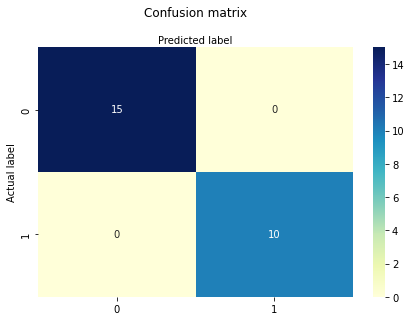

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

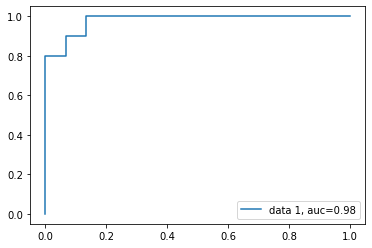

In [72]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [73]:
### Random Forest classification performed at 92%

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=209652396)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=398764591)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=924231285)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1478610112)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=441365315)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1537364731)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=192771779)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1491434855)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=

C:\Users\Personal\AppData\Local\Temp\ipykernel_10196\3998603981.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1340754471)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=124102743)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=2061486254)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=292249176)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1686997841)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1827923621)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1443447321)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=305097549)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_stat

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1354754446)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=463129187)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1562125877)
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1396067212)


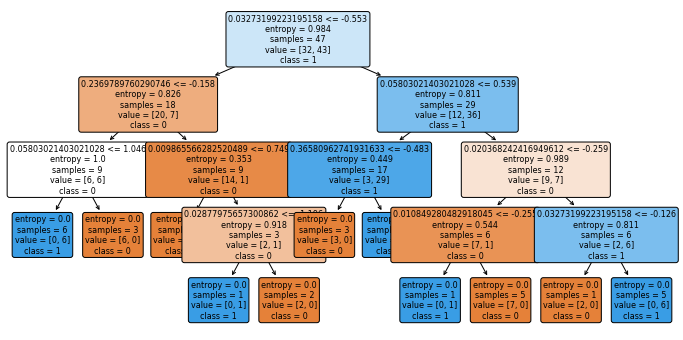

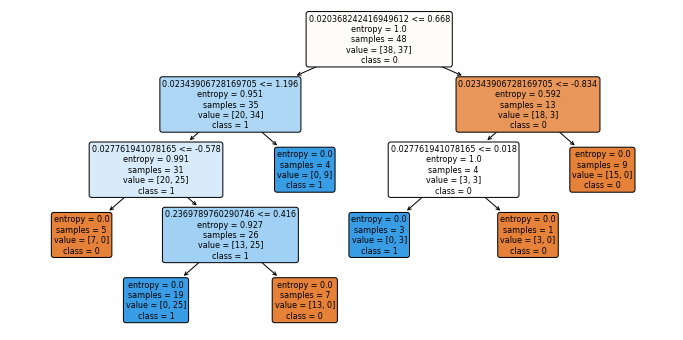

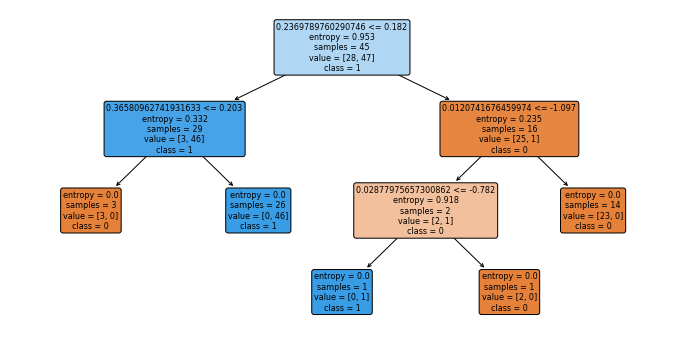

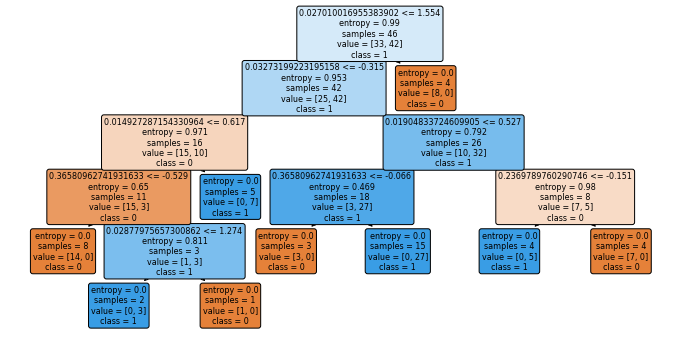

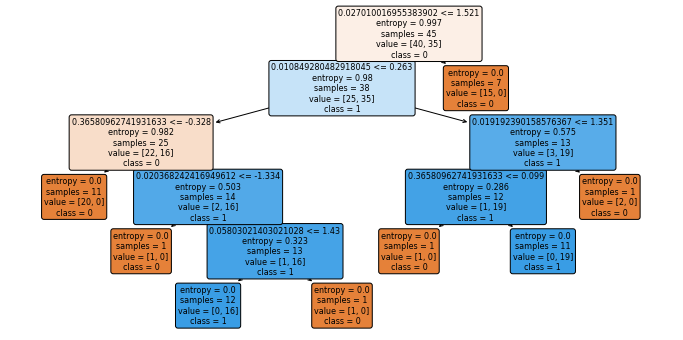

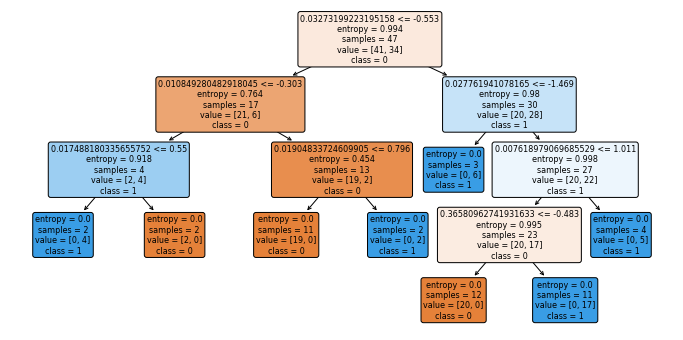

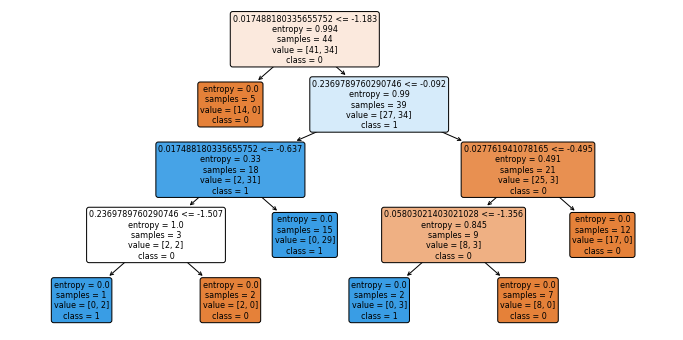

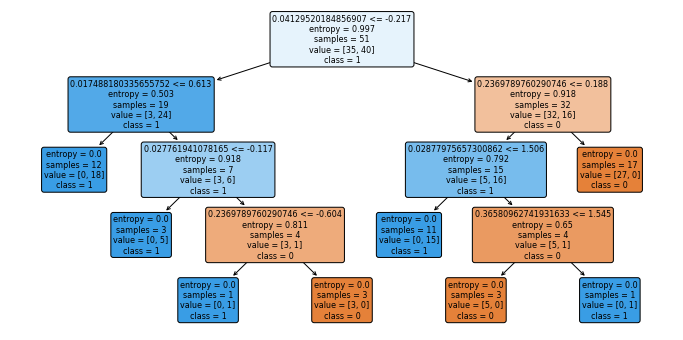

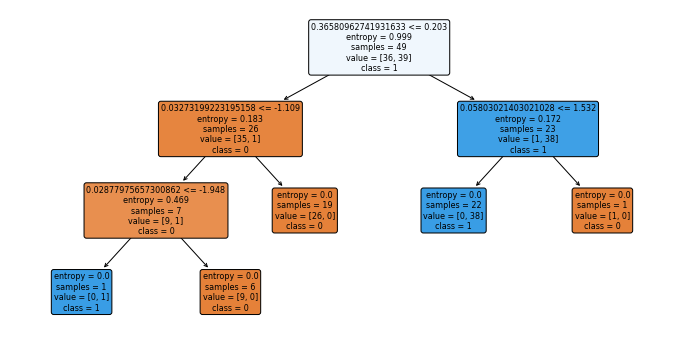

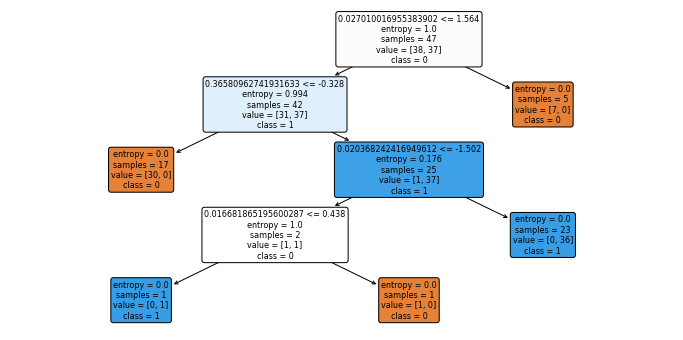

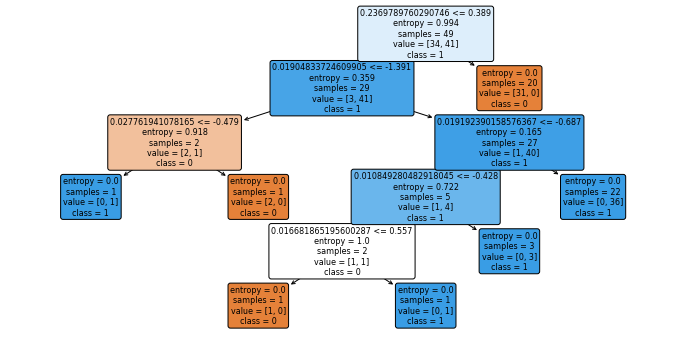

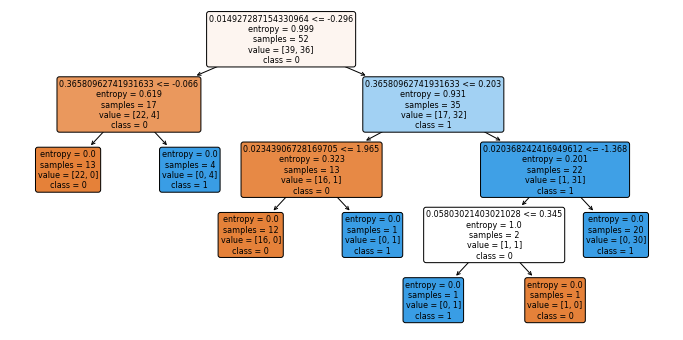

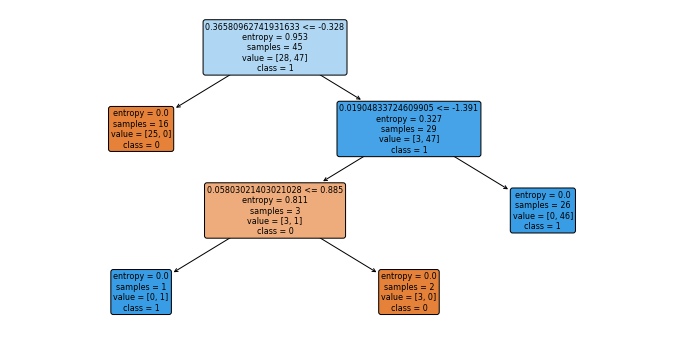

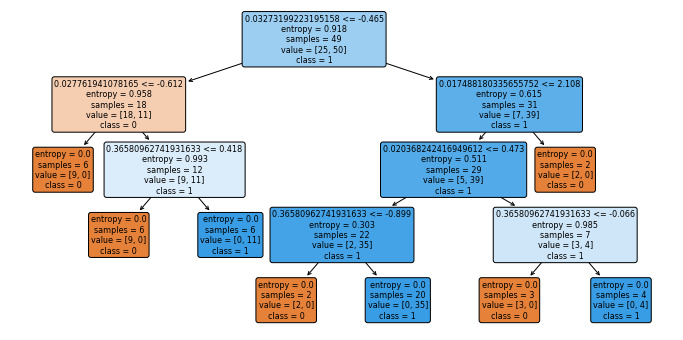

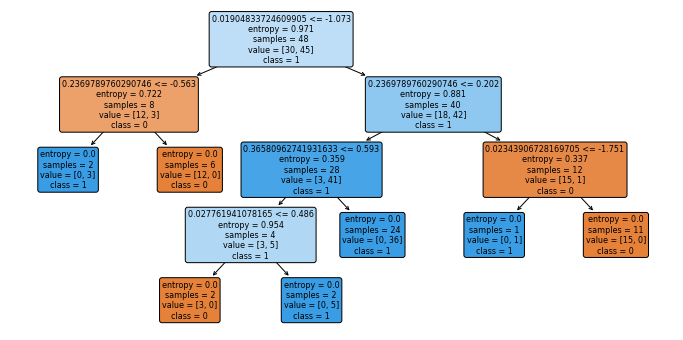

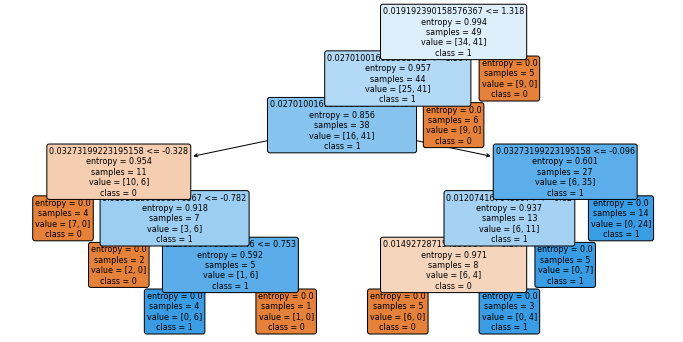

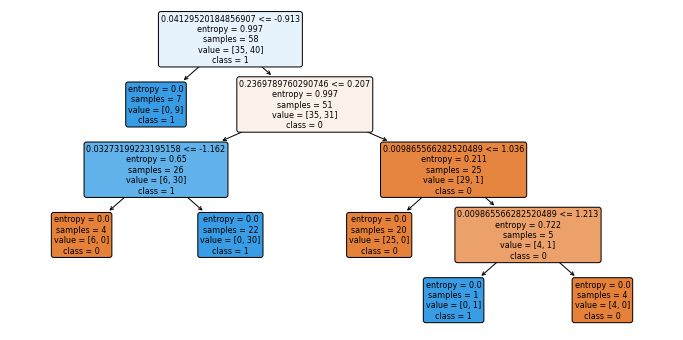

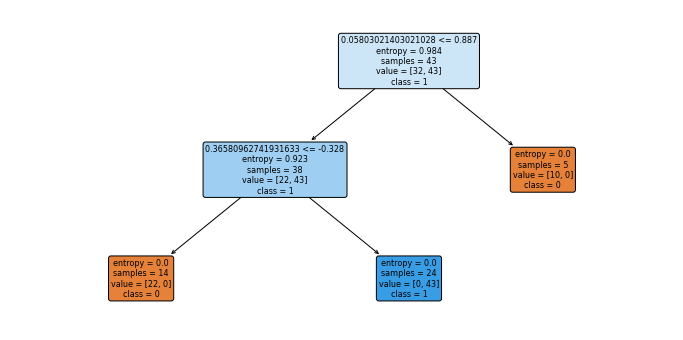

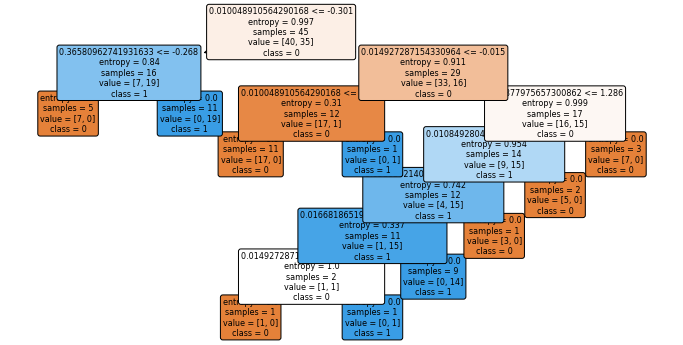

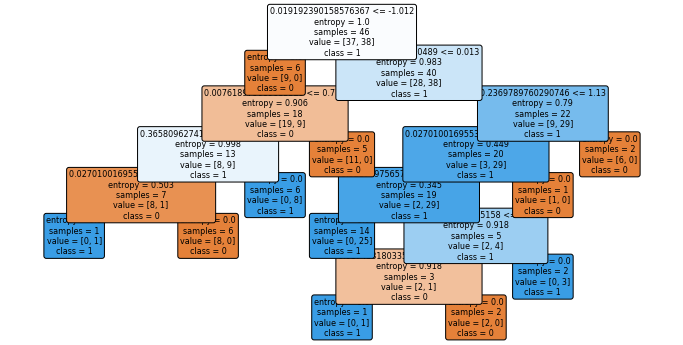

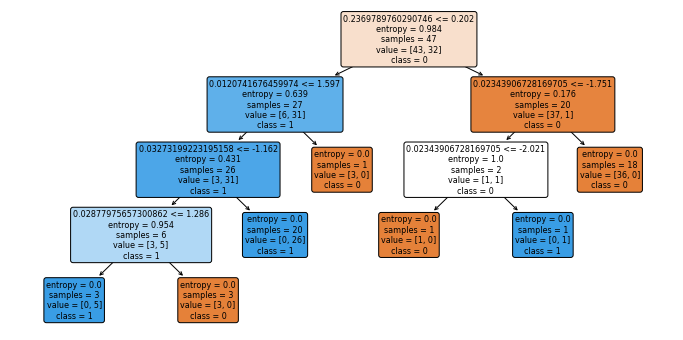

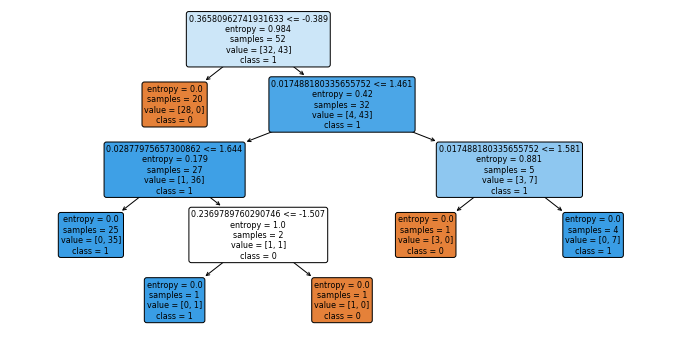

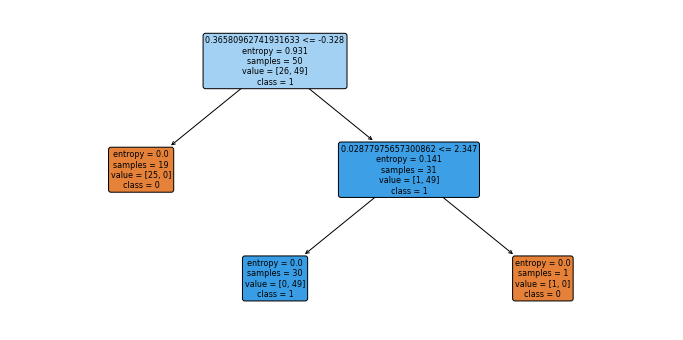

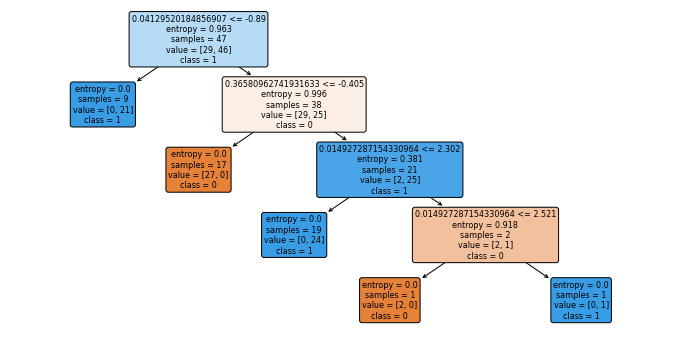

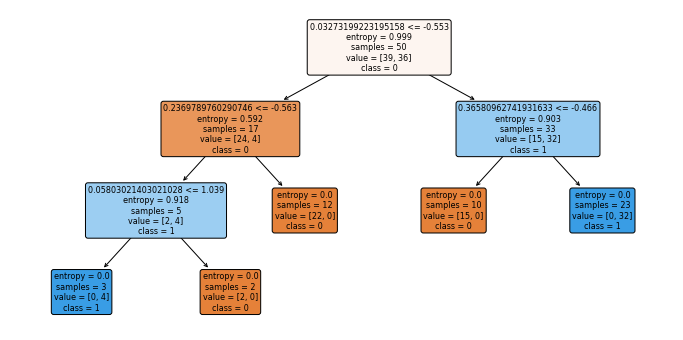

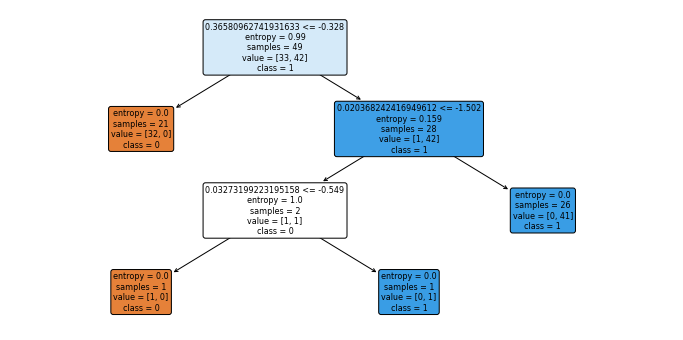

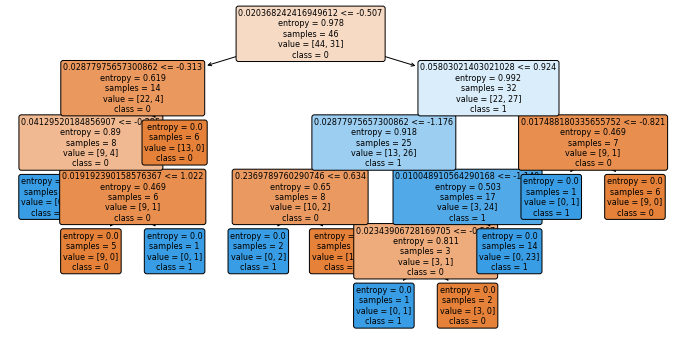

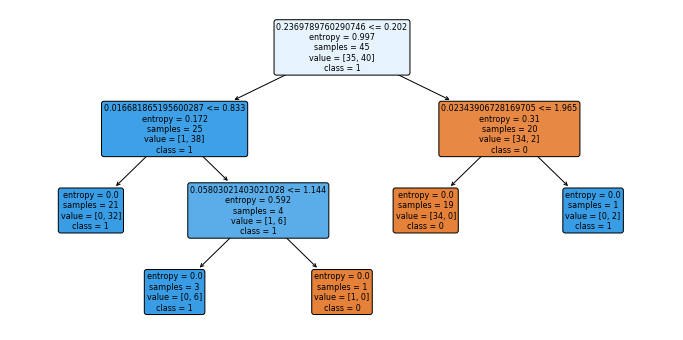

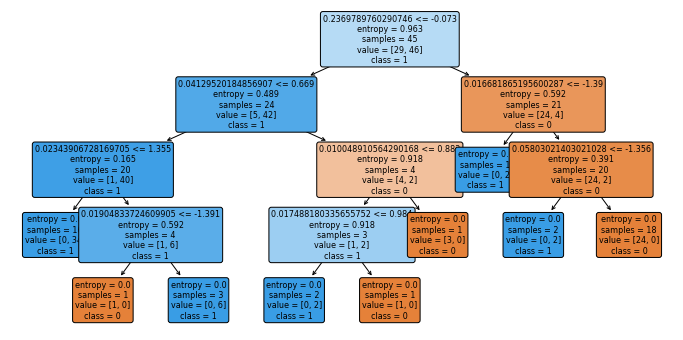

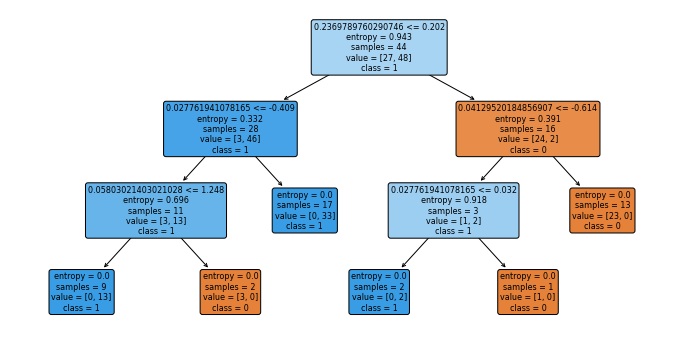

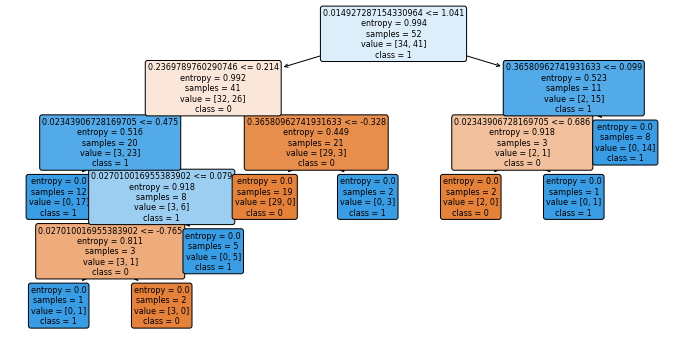

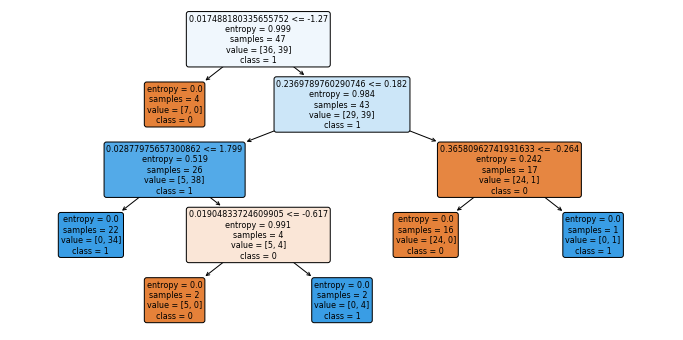

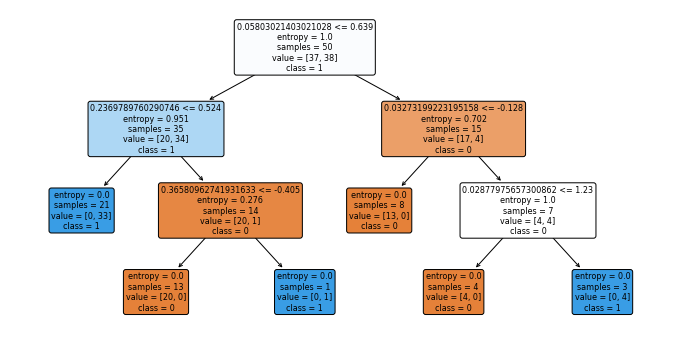

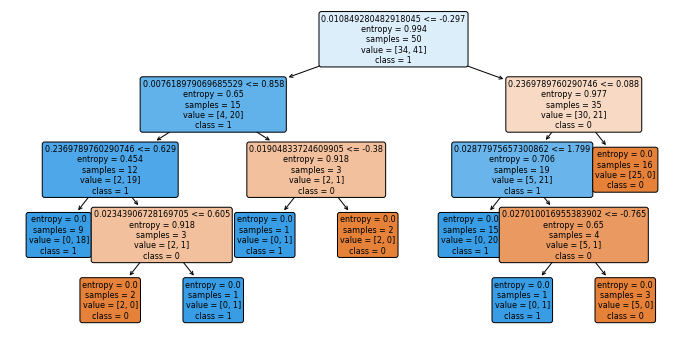

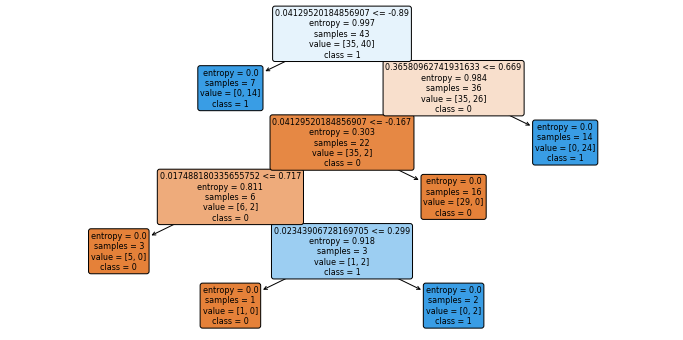

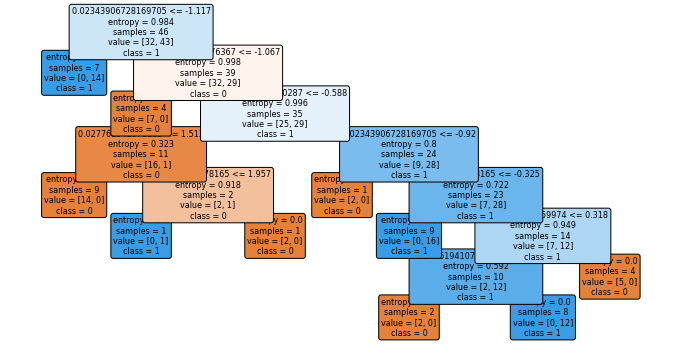

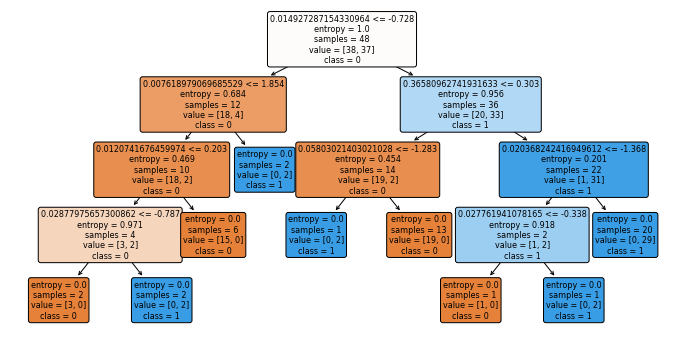

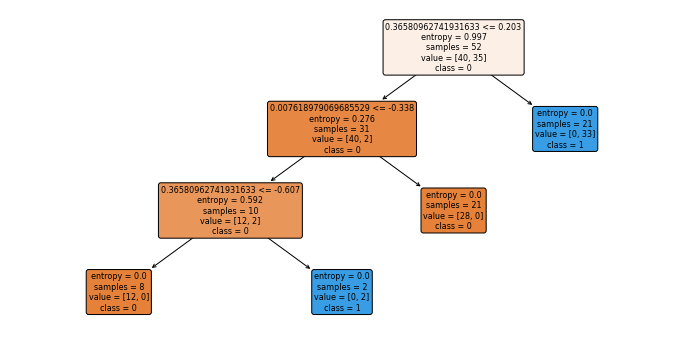

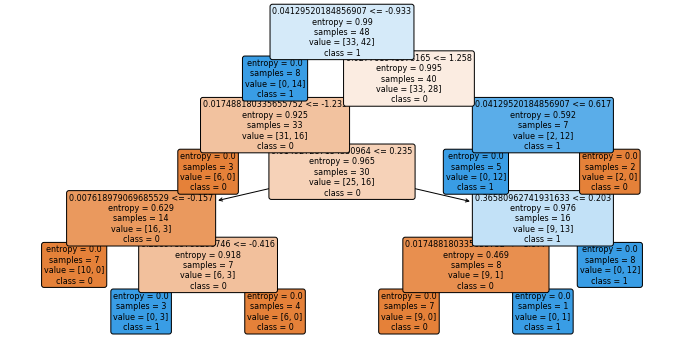

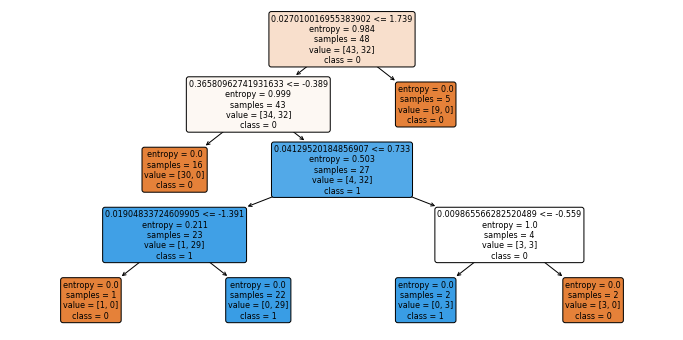

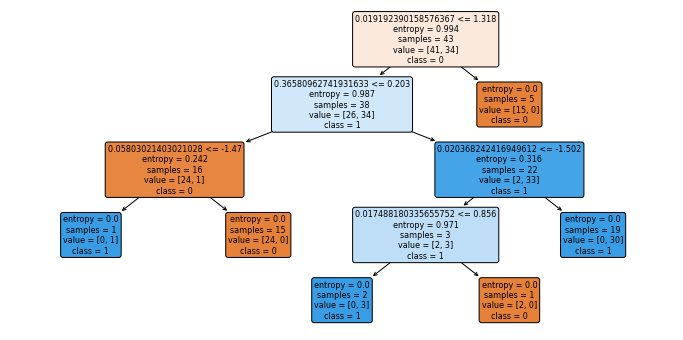

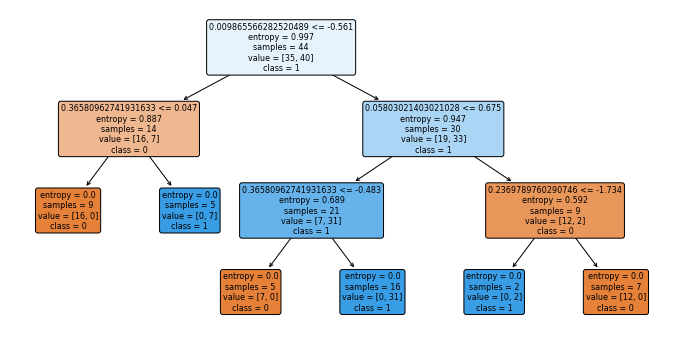

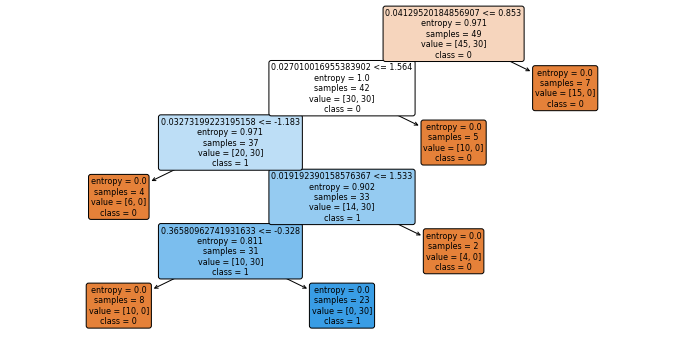

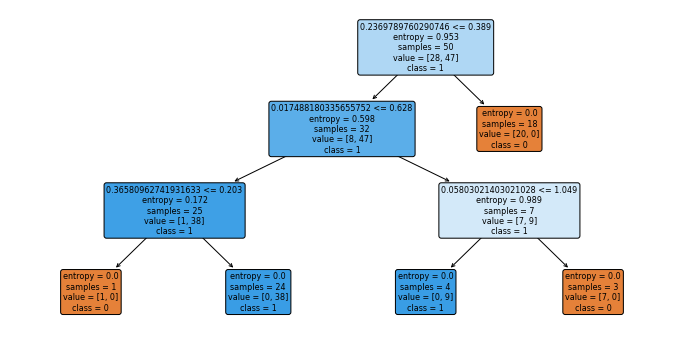

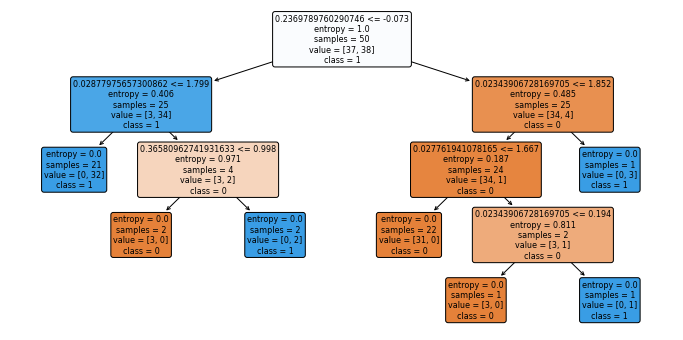

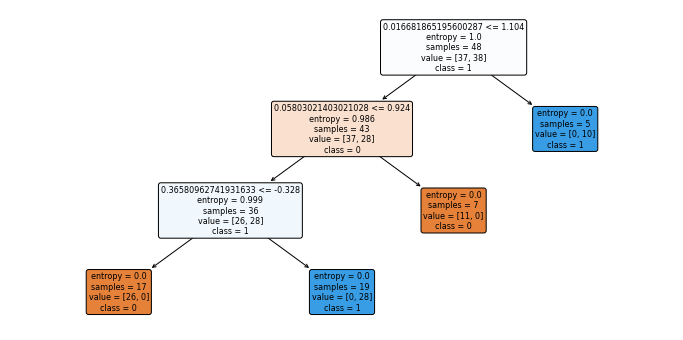

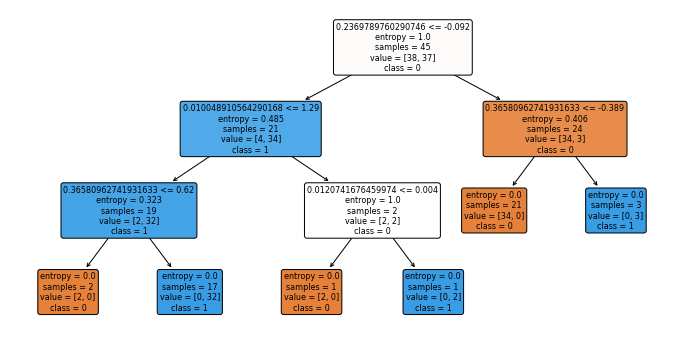

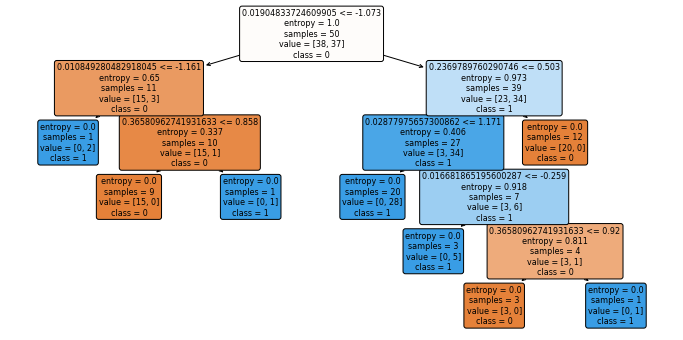

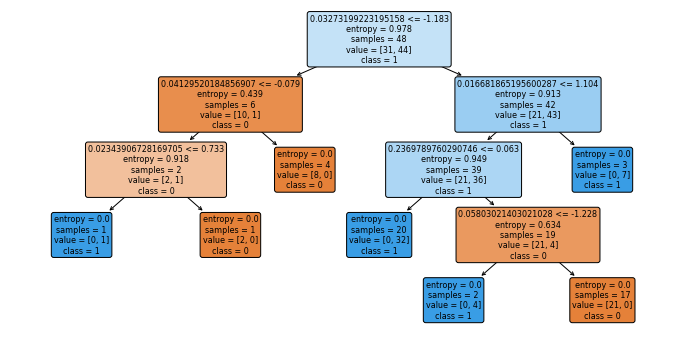

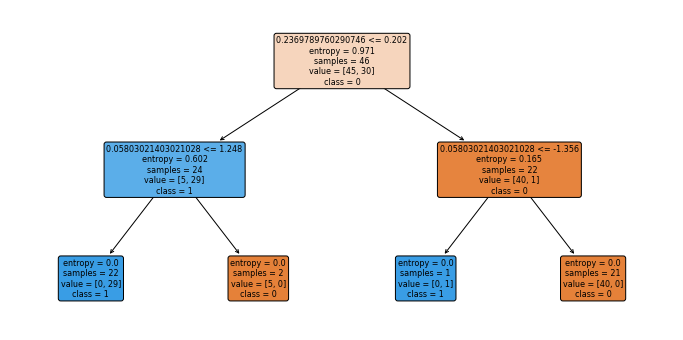

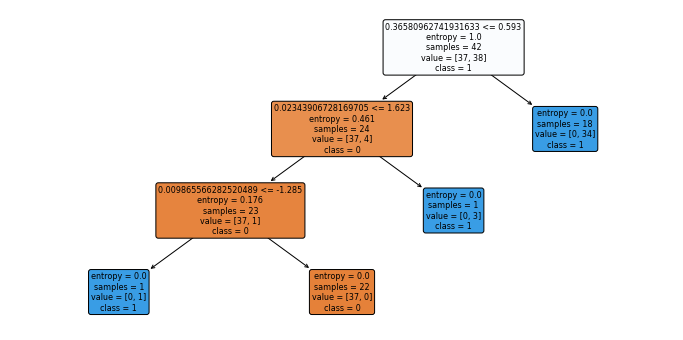

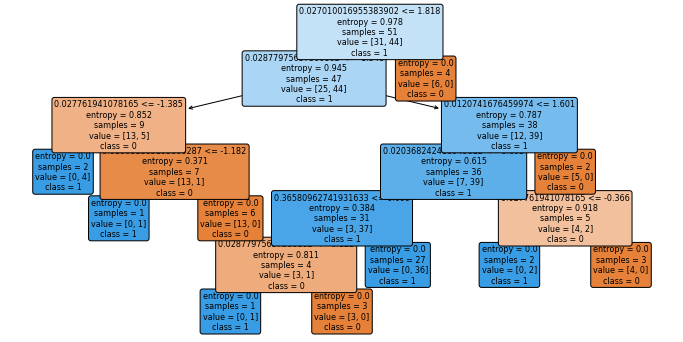

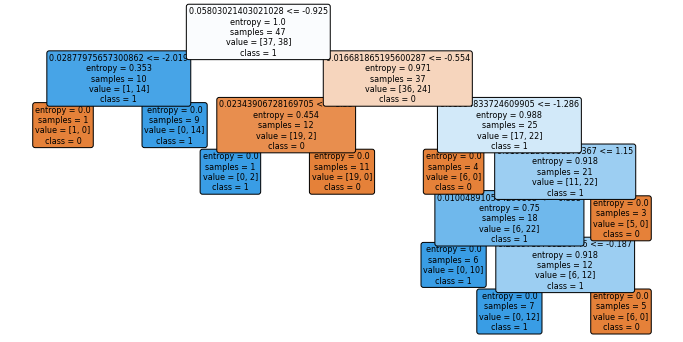

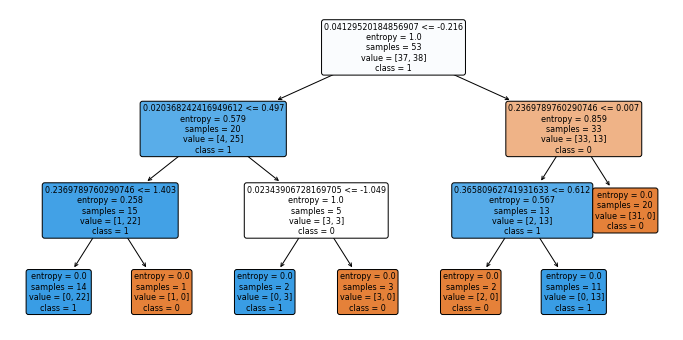

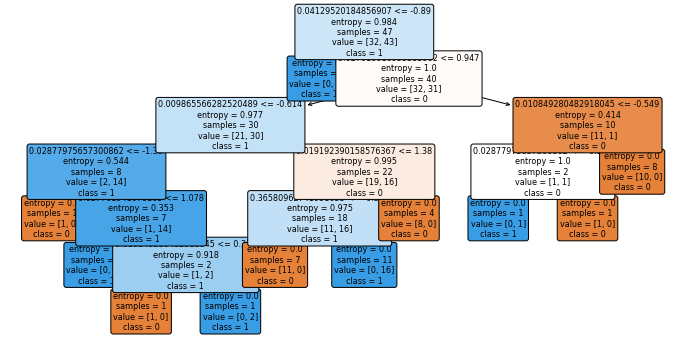

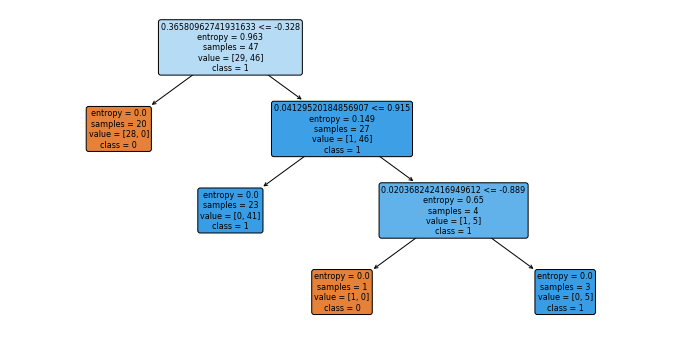

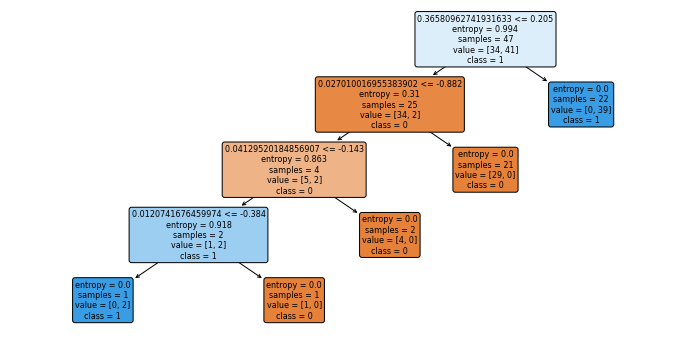

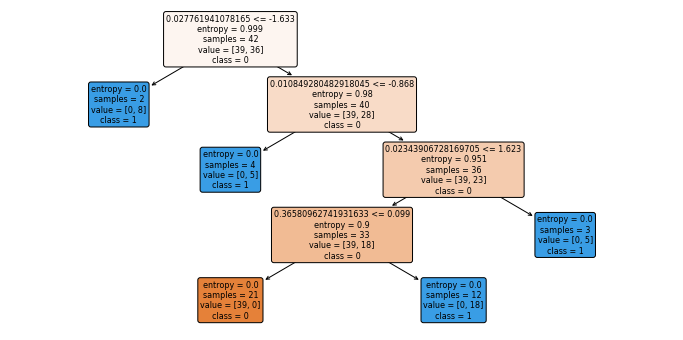

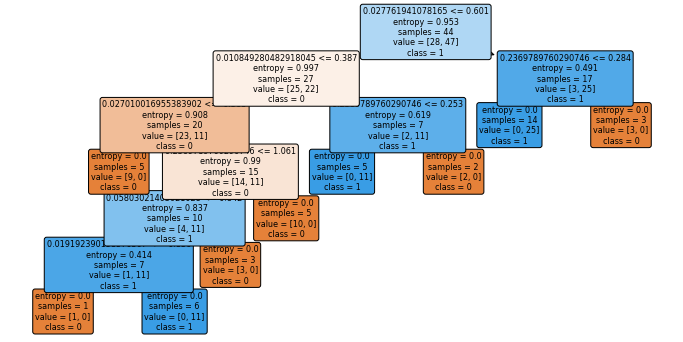

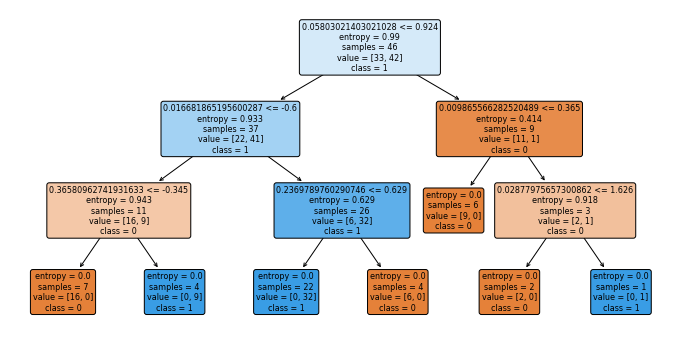

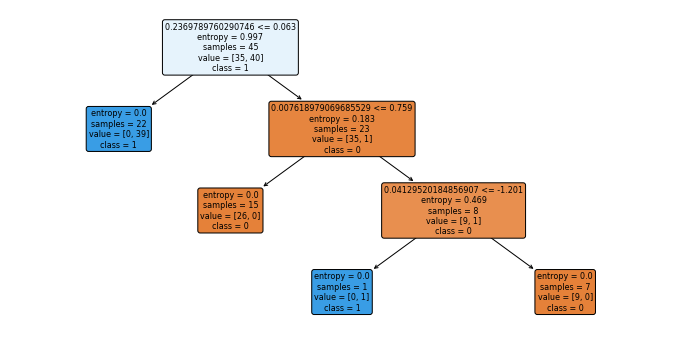

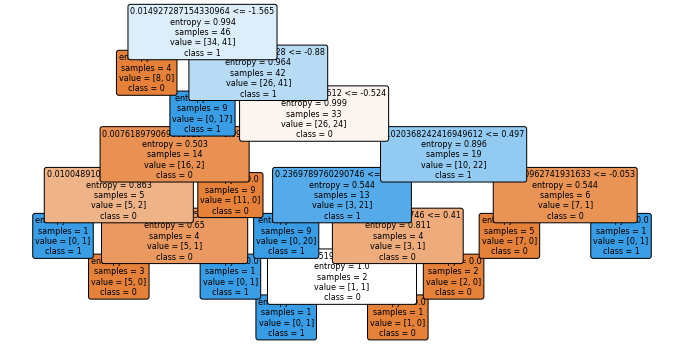

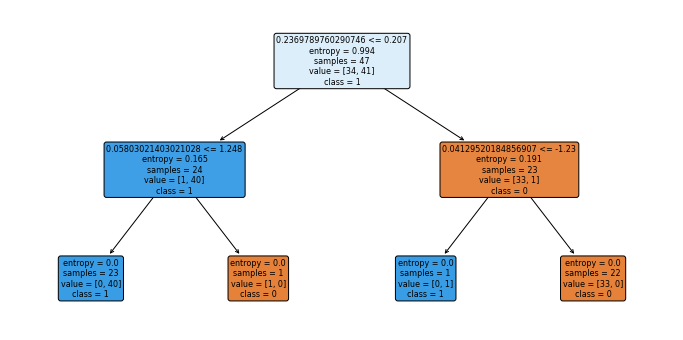

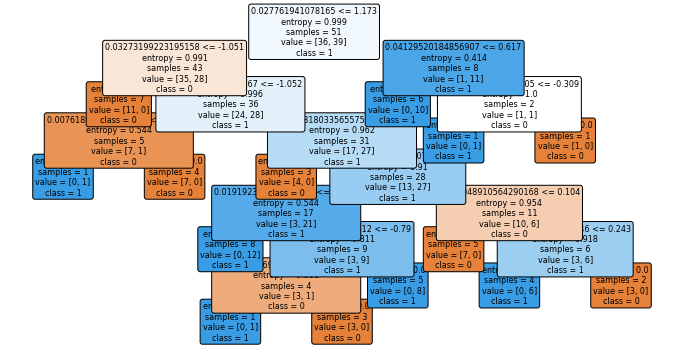

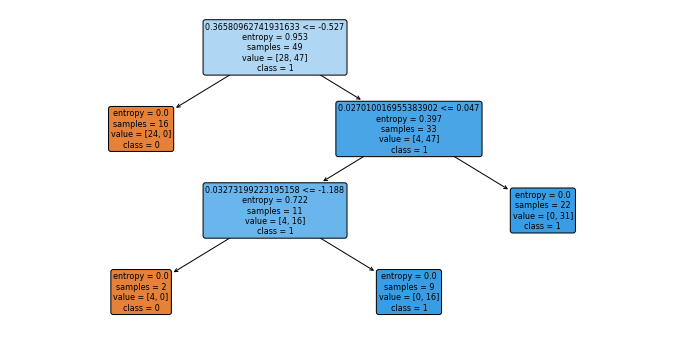

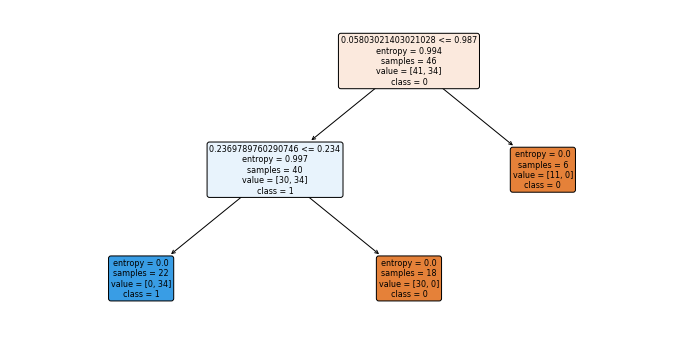

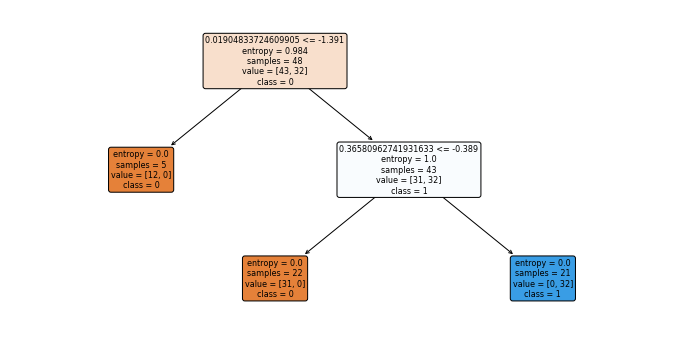

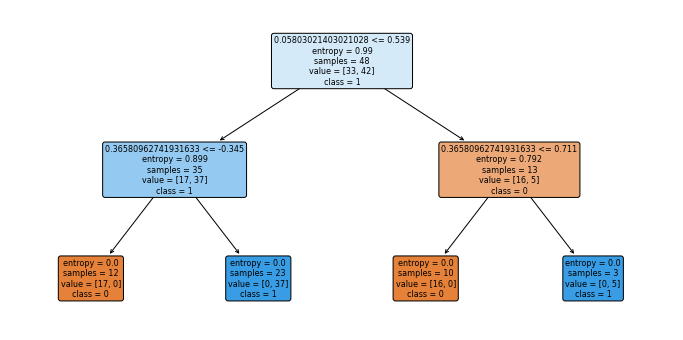

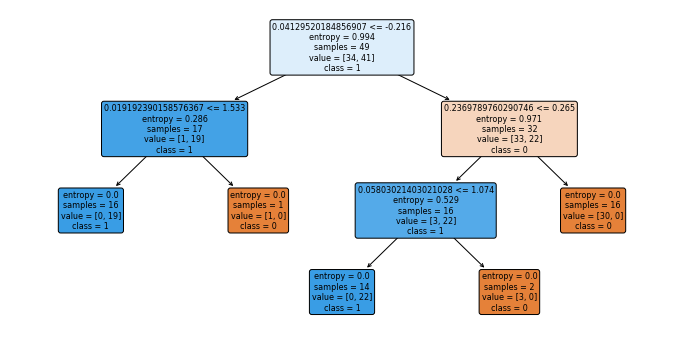

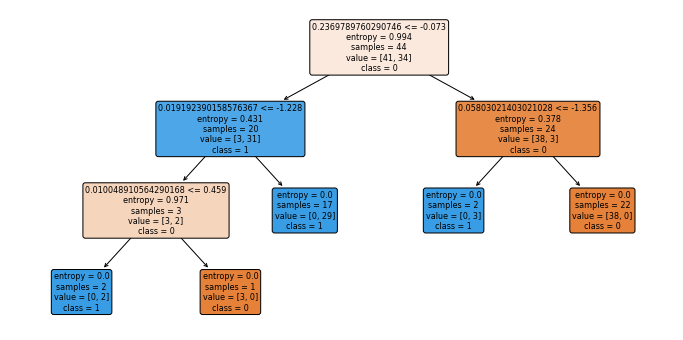

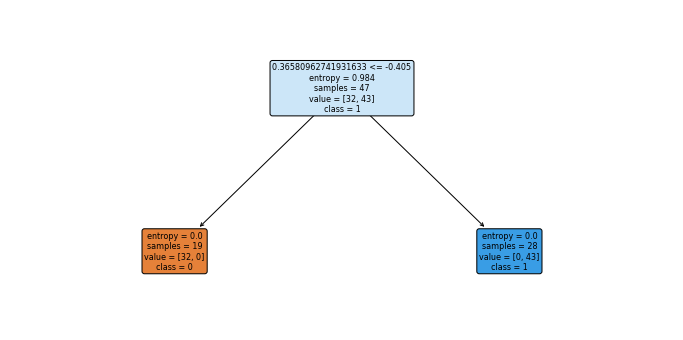

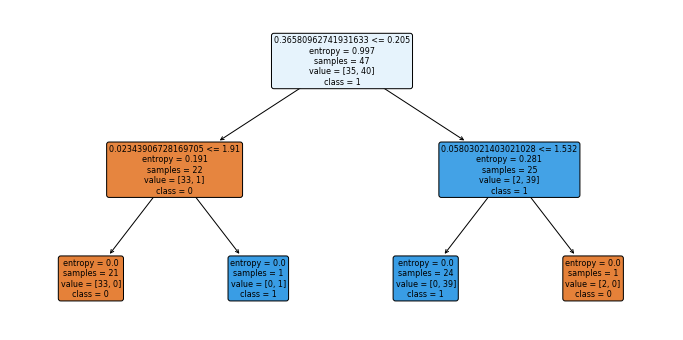

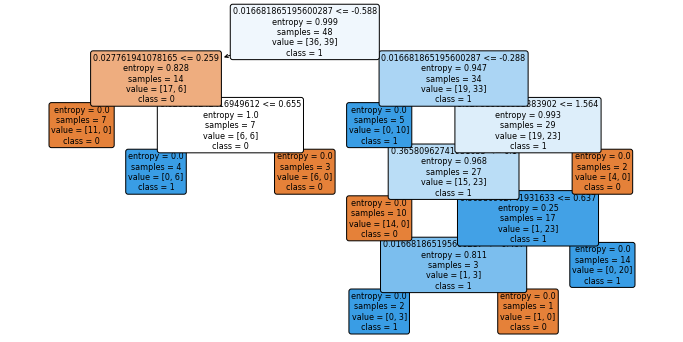

In [60]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython import display
features = model.feature_importances_
classes = ['0','1']
for estimator in model.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
plt.show()
fig.savefig('individualtree.png')
